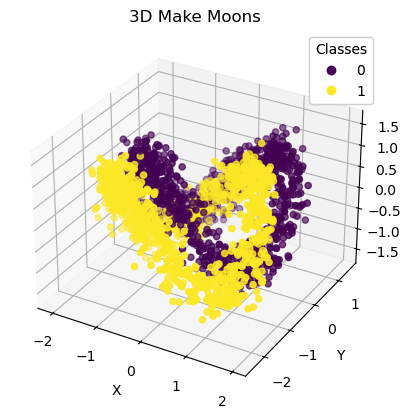

In [92]:
# Generating 3D make-moons data

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_moons_3d(n_samples=500, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)#
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X += np.random.normal(scale=noise, size=X.shape)

    return X, y

# Generate the data (1000 datapoints)
X, labels = make_moons_3d(n_samples=1000, noise=0.2)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Make Moons')
plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import sklearn.tree
def make_moons_3d(n_samples=500, noise=0.1):
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)
    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    labels = np.hstack([np.zeros(n_samples), np.ones(n_samples)])
    X += np.random.normal(scale=noise, size=X.shape)
    return X, labels

X_train, y_train = make_moons_3d(n_samples=500, noise=0.2)
X_test, y_test = make_moons_3d(n_samples=250, noise=0.2)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


可视化函数

In [ ]:

def plot_predictions(X, y_true, y_pred, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    

    correct_indices = np.where(y_true == y_pred)[0]
    ax.scatter(X[correct_indices, 0], X[correct_indices, 1], X[correct_indices, 2], 
               c=y_true[correct_indices], cmap='viridis', marker='o', label='Correct')
    
    # 绘制预测错误的点
    incorrect_indices = np.where(y_true != y_pred)[0]
    ax.scatter(X[incorrect_indices, 0], X[incorrect_indices, 1], X[incorrect_indices, 2], 
               c=y_true[incorrect_indices], cmap='viridis', marker='x', s=100, label='Incorrect')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

Decision Tree Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       250
         1.0       0.93      0.96      0.94       250

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

Accuracy: 0.94


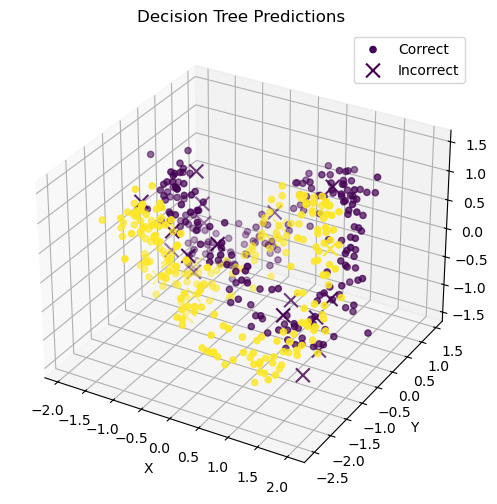

In [ ]:
# 决策树分类器
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, dt_pred))
print("Accuracy:", accuracy_score(y_test, dt_pred))
# 绘制决策树结果
plot_predictions(X_test, y_test, dt_pred, 'Decision Tree Predictions')

d:\anaconda\envs\torch\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost + Decision Tree Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       250
         1.0       0.92      0.97      0.95       250

    accuracy                           0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500

Accuracy: 0.944


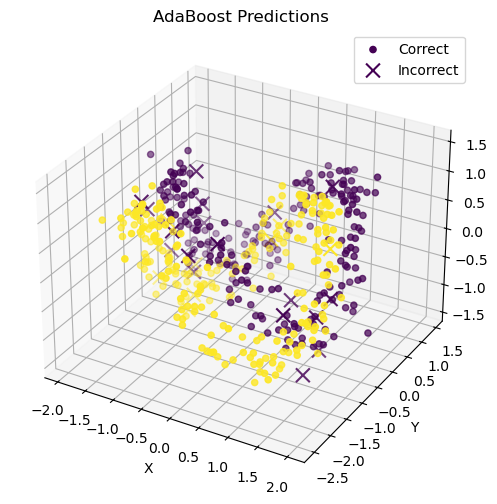

In [101]:
# AdaBoost + 决策树分类器
ab_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
ab_clf.fit(X_train, y_train)
ab_pred = ab_clf.predict(X_test)
print("\nAdaBoost + Decision Tree Performance:")
print(classification_report(y_test, ab_pred))
print("Accuracy:", accuracy_score(y_test, ab_pred))
plot_predictions(X_test, y_test, ab_pred, 'AdaBoost Predictions')



SVM (Linear Kernel) Performance:
              precision    recall  f1-score   support

         0.0       0.67      0.66      0.66       250
         1.0       0.66      0.67      0.67       250

    accuracy                           0.67       500
   macro avg       0.67      0.67      0.67       500
weighted avg       0.67      0.67      0.67       500

Accuracy: 0.666


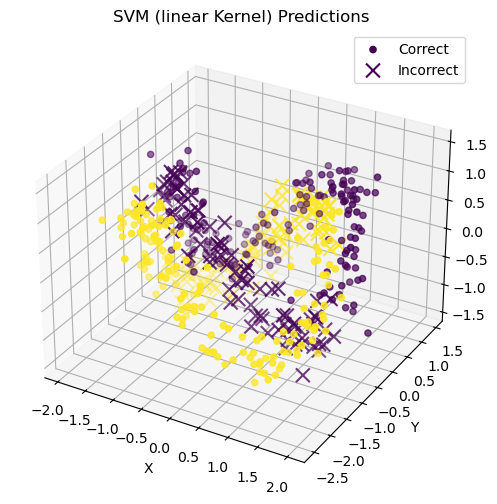

In [97]:
# SVM 分类器（线性核）
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)
print("\nSVM (Linear Kernel) Performance:")
print(classification_report(y_test, svm_linear_pred))
print("Accuracy:", accuracy_score(y_test, svm_linear_pred))
plot_predictions(X_test, y_test, svm_linear_pred, 'SVM (linear Kernel) Predictions')


SVM (Polynomial Kernel) Performance:
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86       250
         1.0       0.93      0.74      0.83       250

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.84       500
weighted avg       0.86      0.85      0.84       500

Accuracy: 0.846


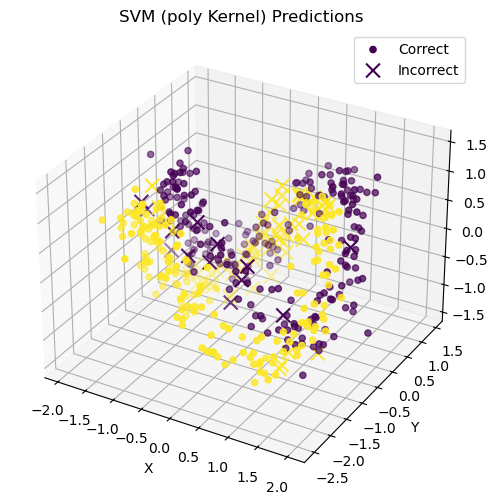

: 

In [ ]:
# SVM 分类器（多项式核）
#多个degree值的多项式核SVM分类器
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
svm_poly_pred = svm_poly.predict(X_test)
print("\nSVM (Polynomial Kernel) Performance:")
print(classification_report(y_test, svm_poly_pred))
print("Accuracy:", accuracy_score(y_test, svm_poly_pred))
plot_predictions(X_test, y_test, svm_poly_pred, 'SVM (poly Kernel) Predictions')


SVM (RBF Kernel) Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       250
         1.0       0.96      0.98      0.97       250

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

Accuracy: 0.972


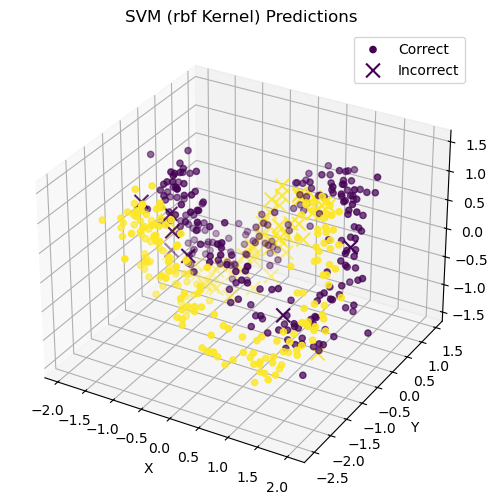

In [99]:
# SVM 分类器（RBF核）
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)
print("\nSVM (RBF Kernel) Performance:")
print(classification_report(y_test, svm_rbf_pred))
print("Accuracy:", accuracy_score(y_test, svm_rbf_pred))
plot_predictions(X_test, y_test, svm_poly_pred, 'SVM (rbf Kernel) Predictions')